In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import itertools
import pandas.util.testing as tm

%matplotlib inline

In [71]:
cwd =os.getcwd()
cwd

'/content'

In [72]:
df = pd.read_csv('1agua_esgoto.csv', sep = ';', encoding = 'utf-8',engine='c')


In [73]:
df.head(50)

,Cidade_operador,So_Agua_yes,Nat_jur_B,Nat_jur_C,PIB_capta_2017,Urbaniz,POP_TOT,POP_URB,AG001,AG001A,AG002,AG002A,AG003,AG003A,AG005,AG005A,AG006,AG007,AG010,AG011,AG013,AG013A,AG021,AG021A,AG026,AG026A,AG028,ES001,ES001A,ES002,ES002A,ES003,ES003A,ES004,ES004A,ES005,ES006,ES007,ES009,ES009A,ES028,FN001,FN002,FN003,FN004,FN005,FN006,FN008,FN008A,FN010,FN011,FN013,FN014,FN015,FN016,FN017,FN018,FN019,FN020,FN021,FN022,FN023,FN024,FN025,FN026,FN026A,FN027,FN028,FN030,FN031,FN032,FN033,FN034,FN035,FN036,FN037,QD002,QD003,QD023,QD024
0,5.100000e+13,1,1,0,17951.61,0.95,9714,9181,9714,9455,3435,3376,3438,3376,64.87,63.07,574.00,0.00,459.00,459.00,3144,3075,3815,3538,8936,8936,31.82,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00,2.029095e+06,2.029095e+06,0.000000e+00,275837.04,2.304932e+06,2.304932e+06,2.516627e+05,1.505469e+05,346845.88,23674.28,150204.25,86801.44,7.740854e+05,236007.21,1.393371e+06,45286.84,24242.58,0.00,11759.53,236007.21,64606.72,0.00,47214.00,6,6,154800.05,123028.17,0.00,0.00,0.00,157107.56,0.00,236007.21,0.00,236007.21,0,0,5213,5213
1,1.100000e+13,0,1,0,21389.67,0.85,106168,89920,96911,86193,26937,23958,29367,26119,165.16,165.16,5429.97,5429.97,2948.06,2524.34,29367,26119,35225,33227,89920,86193,3613.91,2165,1865,647,565,656,565,9.06,9.06,125.95,125.95,84.71,647,642,13.87,8.379660e+06,8.269992e+06,1.096681e+05,1488231.30,9.867892e+06,8.179016e+06,3.907995e+06,2.598669e+06,1480019.96,338958.25,1264064.25,1888071.56,8.473170e+06,0.00,1.664429e+07,0.00,1418126.89,0.00,283299.08,0.00,3242903.13,2271166.60,973218.83,73,36,3218756.55,6752995.29,0.00,6487288.56,0.00,6487288.56,0.00,0.00,0.00,0.00,12,72,42310,42310
2,3.500000e+13,0,1,0,34385.26,0.93,57112,53309,55334,53531,21636,21627,22705,23207,262.24,259.01,5147.00,0.00,3509.00,4012.00,21156,21549,24077,24459,52567,53531,4290.43,55334,53531,23002,22122,24090,22135,214.96,211.59,3526.09,3509.00,4119.00,23002,22122,142.31,2.053357e+07,1.130655e+07,9.227029e+06,1005582.95,2.153916e+07,2.039229e+07,3.503500e+06,2.731554e+06,2918120.52,112937.86,2472755.79,2593981.32,1.209417e+07,1177489.84,1.623366e+07,0.00,1603077.14,0.00,2111820.38,1358922.07,5192461.88,3663465.04,1344167.06,57,45,1884555.67,0.00,4918093.98,5282000.00,0.00,10200093.98,1940185.62,1177489.84,0.00,3117675.46,0,0,73325,71886
3,5.100000e+13,0,1,0,29714.34,0.87,51615,44848,44848,43609,14365,14024,15999,15599,221.39,220.00,3123.00,3123.00,2249.36,2688.96,14805,14666,17504,17043,44848,43609,1382.00,23769,23025,5109,4357,5706,5259,117.51,117.00,1175.00,1175.00,846.21,5387,4564,311.18,1.312306e+07,9.633466e+06,3.489589e+06,643527.51,1.376658e+07,1.289302e+07,3.410866e+06,3.446471e+06,1197174.11,424900.60,917508.14,1105292.88,6.252944e+06,1532788.55,1.097092e+07,0.00,1976486.58,0.00,1541568.04,1208705.44,843119.24,287465.59,615642.44,28,24,1066499.83,0.00,1746227.27,0.00,0.00,1746227.27,8395374.90,1532788.55,0.00,9928163.45,0,0,45398,41153
4,4.200000e+13,0,1,0,32125.78,1.00,19193,19193,19193,18623,8946,7923,17959,17068,169.00,166.00,958.00,958.00,1490.27,2481.29,16554,12034,9852,9387,19193,18623,251.48,3532,3427,646,623,2879,2696,16.00,16.00,283.81,283.81,378.86,705,680,205.60,1.489057e+07,1.292012e+07,1.970449e+06,566761.87,1.545733e+07,1.520821e+07,3.077873e+06,3.326037e+05,1815759.06,199263.22,335284.30,2348499.14,9.553442e+06,0.00,1.143233e+07,0.00,635301.23,2250769.63,137609.24,1168704.61,34019246.71,2362665.13,700788.20,33,39,2466257.67,74880.52,0.00,37082700.04,0.00,37082700.04,0.00,0.00,0.00,0.00,0,0,14347,12844
5,5.100000e+13,0,1,0,29744.71,0.90,60661,54641,60661,58974,24405,23649,25911,25157,390.13,386.62,6483.46,6483.46,3647.50,4384.48,24305,23366,28797,27458,54641,53121,5213.98,42871,41724,12618,12003,13772,13162,190.00,180.53,1855.25,1855.25,2377.85,14113,13271,424.99,2.294212e+07,1.637888e+07,6.563243e+06,894948.17,2.383707e+07,2.302202e+07,3.979908e+06,3.732198e+06,1730059.54,413853.86,2949367.88,2370315.73,9.781083e+06,5718514.91,2.124993e+07,0.00,2268787.95,0.00,751847.61,1771211.87,2745926.49,9634

In [74]:
df.shape

(5200, 80)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cidade_operador  5200 non-null   float64
 1   So_Agua_yes      5200 non-null   int64  
 2   Nat_jur_B        5200 non-null   int64  
 3   Nat_jur_C        5200 non-null   int64  
 4   PIB_capta_2017   5200 non-null   float64
 5   Urbaniz          5200 non-null   float64
 6   POP_TOT          5200 non-null   int64  
 7   POP_URB          5200 non-null   int64  
 8   AG001            5200 non-null   int64  
 9   AG001A           5200 non-null   int64  
 10  AG002            5200 non-null   int64  
 11  AG002A           5200 non-null   int64  
 12  AG003            5200 non-null   int64  
 13  AG003A           5200 non-null   int64  
 14  AG005            5200 non-null   float64
 15  AG005A           5200 non-null   float64
 16  AG006            5200 non-null   float64
 17  AG007         

In [76]:
# Apresentação de variáveis e número de valores únicos por variável do Dataframe:
df.nunique()

Cidade_operador      70
So_Agua_yes           2
Nat_jur_B             2
Nat_jur_C             2
PIB_capta_2017     4886
                   ... 
FN037              3332
QD002               160
QD003               668
QD023              3368
QD024              3213
Length: 80, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae84fa7080>,
      dtype=object)

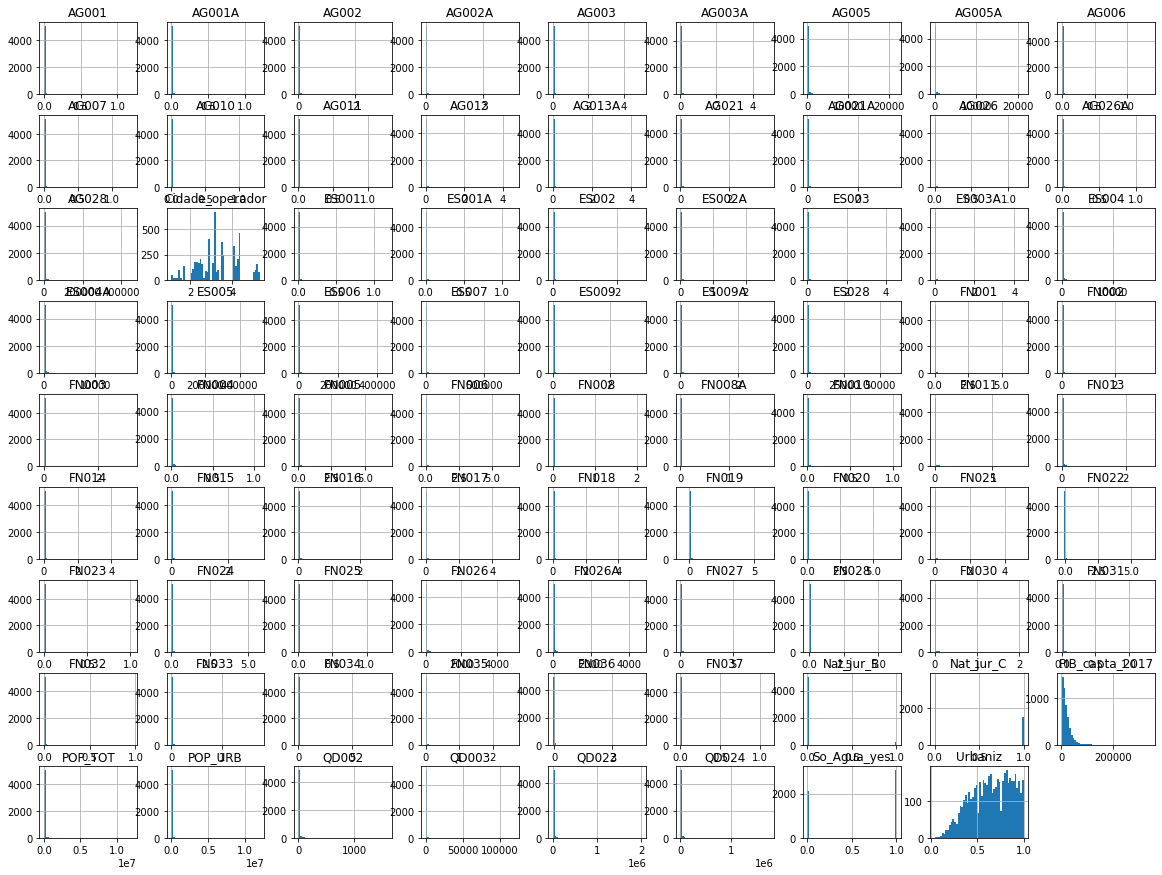

In [77]:
df.hist(bins=50, figsize=(20,15))

In [78]:
# Criando uma base em que variável com nova coluna 'target' com valor numérico para attrition
df1_a = df.copy()
df1_a['Target'] = df1_a['Nat_jur_B']
df1_a

,Cidade_operador,So_Agua_yes,Nat_jur_B,Nat_jur_C,PIB_capta_2017,Urbaniz,POP_TOT,POP_URB,AG001,AG001A,AG002,AG002A,AG003,AG003A,AG005,AG005A,AG006,AG007,AG010,AG011,AG013,AG013A,AG021,AG021A,AG026,AG026A,AG028,ES001,ES001A,ES002,ES002A,ES003,ES003A,ES004,ES004A,ES005,ES006,ES007,ES009,ES009A,...,FN001,FN002,FN003,FN004,FN005,FN006,FN008,FN008A,FN010,FN011,FN013,FN014,FN015,FN016,FN017,FN018,FN019,FN020,FN021,FN022,FN023,FN024,FN025,FN026,FN026A,FN027,FN028,FN030,FN031,FN032,FN033,FN034,FN035,FN036,FN037,QD002,QD003,QD023,QD024,Target
0,5.100000e+13,1,1,0,17951.61,0.95,9714,9181,9714,9455,3435,3376,3438,3376,64.87,63.07,574.00,0.00,459.00,459.00,3144,3075,3815,3538,8936,8936,31.82,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,...,2029094.57,2029094.57,0.00,275837.04,2304931.61,2304931.61,251662.68,150546.86,346845.88,23674.28,150204.25,86801.44,774085.43,236007.21,1393370.60,45286.84,24242.58,0.00,11759.53,236007.21,64606.72,0.00,47214.00,6,6,154800.05,123028.17,0.00,0.00,0.0,157107.56,0.00,236007.21,0.00,236007.21,0,0,5213,5213,1
1,1.100000e+13,0,1,0,21389.67,0.85,106168,89920,96911,86193,26937,23958,29367,26119,165.16,165.16,5429.97,5429.97,2948.06,2524.34,29367,26119,35225,33227,89920,86193,3613.91,2165,1865,647,565,656,565,9.06,9.06,125.95,125.95,84.71,647,642,...,8379660.27,8269992.20,109668.07,1488231.30,9867891.57,8179015.84,3907995.36,2598668.62,1480019.96,338958.25,1264064.25,1888071.56,8473169.65,0.00,16644291.83,0.00,1418126.89,0.00,283299.08,0.00,3242903.13,2271166.60,973218.83,73,36,3218756.55,6752995.29,0.00,6487288.56,0.0,6487288.56,0.00,0.00,0.00,0.00,12,72,42310,42310,1
2,3.500000e+13,0,1,0,34385.26,0.93,57112,53309,55334,53531,21636,21627,22705,23207,262.24,259.01,5147.00,0.00,3509.00,4012.00,21156,21549,24077,24459,52567,53531,4290.43,55334,53531,23002,22122,24090,22135,214.96,211.59,3526.09,3509.00,4119.00,23002,22122,...,20533574.11,11306545.16,9227028.95,1005582.95,21539157.06,20392290.22,3503500.06,2731553.64,2918120.52,112937.86,2472755.79,2593981.32,12094171.54,1177489.84,16233660.59,0.00,1603077.14,0.00,2111820.38,1358922.07,5192461.88,3663465.04,1344167.06,57,45,1884555.67,0.00,4918093.98,5282000.00,0.0,10200093.98,1940185.62,1177489.84,0.00,3117675.46,0,0,73325,71886,1
3,5.100000e+13,0,1,0,29714.34,0.87,51615,44848,44848,43609,14365,14024,15999,15599,221.39,220.00,3123.00,3123.00,2249.36,2688.96,14805,14666,17504,17043,44848,43609,1382.00,23769,23025,5109,4357,5706,5259,117.51,117.00,1175.00,1175.00,846.21,5387,4564,...,13123055.54,9633466.15,3489589.39,643527.51,13766583.05,12893018.09,3410866.27,3446471.00,1197174.11,424900.60,917508.14,1105292.88,6252943.60,1532788.55,10970924.17,0.00,1976486.58,0.00,1541568.04,1208705.44,843119.24,287465.59,615642.44,28,24,1066499.83,0.00,1746227.27,0.00,0.0,1746227.27,8395374.90,1532788.55,0.00,9928163.45,0,0,45398,41153,1
4,4.200000e+13,0,1,0,32125.78,1.00,19193,19193,19193,18623,8946,7923,17959,17068,169.00,166.00,958.00,958.00,1490.27,2481.29,16554,12034,9852,9387,19193,18623,251.48,3532,3427,646,623,2879,2696,16.00,16.00,283.81,283.81,378.86,705,680,...,14890569.01,12920120.30,1970448.71,566761.87,15457330.88,15208212.22,3077872.73,332603.74,1815759.06,199263.22,335284.30,2348499.14,9553442.26,0.00,11432328.62,0.00,635301.23,2250769.63,137609.24,1168704.61,34019246.71,2362665.13,700788.20,33,39,2466257.67,74880.52,0.00,37082700.04,0.0,37082700.04,0.00,0.00,0.00,0.00,0,0,14347,12844,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,3.530000e+13,0,0,0,35562.72,0.97,17111,16603,16603,16603,5822,5737,5822,5925,87.54,87.33,1945.00,0.00,926.50,1052.00,0,5314,6108,5780,16603,16603,1929.00,16603,16603,5727,5640,5727,5640,69.13,68.60,1248.00,741.20,1248.00,5727,5640,...,5488700.43,3049278.02,2

In [79]:
df1_a

,Cidade_operador,So_Agua_yes,Nat_jur_B,Nat_jur_C,PIB_capta_2017,Urbaniz,POP_TOT,POP_URB,AG001,AG001A,AG002,AG002A,AG003,AG003A,AG005,AG005A,AG006,AG007,AG010,AG011,AG013,AG013A,AG021,AG021A,AG026,AG026A,AG028,ES001,ES001A,ES002,ES002A,ES003,ES003A,ES004,ES004A,ES005,ES006,ES007,ES009,ES009A,...,FN001,FN002,FN003,FN004,FN005,FN006,FN008,FN008A,FN010,FN011,FN013,FN014,FN015,FN016,FN017,FN018,FN019,FN020,FN021,FN022,FN023,FN024,FN025,FN026,FN026A,FN027,FN028,FN030,FN031,FN032,FN033,FN034,FN035,FN036,FN037,QD002,QD003,QD023,QD024,Target
0,5.100000e+13,1,1,0,17951.61,0.95,9714,9181,9714,9455,3435,3376,3438,3376,64.87,63.07,574.00,0.00,459.00,459.00,3144,3075,3815,3538,8936,8936,31.82,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,...,2029094.57,2029094.57,0.00,275837.04,2304931.61,2304931.61,251662.68,150546.86,346845.88,23674.28,150204.25,86801.44,774085.43,236007.21,1393370.60,45286.84,24242.58,0.00,11759.53,236007.21,64606.72,0.00,47214.00,6,6,154800.05,123028.17,0.00,0.00,0.0,157107.56,0.00,236007.21,0.00,236007.21,0,0,5213,5213,1
1,1.100000e+13,0,1,0,21389.67,0.85,106168,89920,96911,86193,26937,23958,29367,26119,165.16,165.16,5429.97,5429.97,2948.06,2524.34,29367,26119,35225,33227,89920,86193,3613.91,2165,1865,647,565,656,565,9.06,9.06,125.95,125.95,84.71,647,642,...,8379660.27,8269992.20,109668.07,1488231.30,9867891.57,8179015.84,3907995.36,2598668.62,1480019.96,338958.25,1264064.25,1888071.56,8473169.65,0.00,16644291.83,0.00,1418126.89,0.00,283299.08,0.00,3242903.13,2271166.60,973218.83,73,36,3218756.55,6752995.29,0.00,6487288.56,0.0,6487288.56,0.00,0.00,0.00,0.00,12,72,42310,42310,1
2,3.500000e+13,0,1,0,34385.26,0.93,57112,53309,55334,53531,21636,21627,22705,23207,262.24,259.01,5147.00,0.00,3509.00,4012.00,21156,21549,24077,24459,52567,53531,4290.43,55334,53531,23002,22122,24090,22135,214.96,211.59,3526.09,3509.00,4119.00,23002,22122,...,20533574.11,11306545.16,9227028.95,1005582.95,21539157.06,20392290.22,3503500.06,2731553.64,2918120.52,112937.86,2472755.79,2593981.32,12094171.54,1177489.84,16233660.59,0.00,1603077.14,0.00,2111820.38,1358922.07,5192461.88,3663465.04,1344167.06,57,45,1884555.67,0.00,4918093.98,5282000.00,0.0,10200093.98,1940185.62,1177489.84,0.00,3117675.46,0,0,73325,71886,1
3,5.100000e+13,0,1,0,29714.34,0.87,51615,44848,44848,43609,14365,14024,15999,15599,221.39,220.00,3123.00,3123.00,2249.36,2688.96,14805,14666,17504,17043,44848,43609,1382.00,23769,23025,5109,4357,5706,5259,117.51,117.00,1175.00,1175.00,846.21,5387,4564,...,13123055.54,9633466.15,3489589.39,643527.51,13766583.05,12893018.09,3410866.27,3446471.00,1197174.11,424900.60,917508.14,1105292.88,6252943.60,1532788.55,10970924.17,0.00,1976486.58,0.00,1541568.04,1208705.44,843119.24,287465.59,615642.44,28,24,1066499.83,0.00,1746227.27,0.00,0.0,1746227.27,8395374.90,1532788.55,0.00,9928163.45,0,0,45398,41153,1
4,4.200000e+13,0,1,0,32125.78,1.00,19193,19193,19193,18623,8946,7923,17959,17068,169.00,166.00,958.00,958.00,1490.27,2481.29,16554,12034,9852,9387,19193,18623,251.48,3532,3427,646,623,2879,2696,16.00,16.00,283.81,283.81,378.86,705,680,...,14890569.01,12920120.30,1970448.71,566761.87,15457330.88,15208212.22,3077872.73,332603.74,1815759.06,199263.22,335284.30,2348499.14,9553442.26,0.00,11432328.62,0.00,635301.23,2250769.63,137609.24,1168704.61,34019246.71,2362665.13,700788.20,33,39,2466257.67,74880.52,0.00,37082700.04,0.0,37082700.04,0.00,0.00,0.00,0.00,0,0,14347,12844,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,3.530000e+13,0,0,0,35562.72,0.97,17111,16603,16603,16603,5822,5737,5822,5925,87.54,87.33,1945.00,0.00,926.50,1052.00,0,5314,6108,5780,16603,16603,1929.00,16603,16603,5727,5640,5727,5640,69.13,68.60,1248.00,741.20,1248.00,5727,5640,...,5488700.43,3049278.02,2

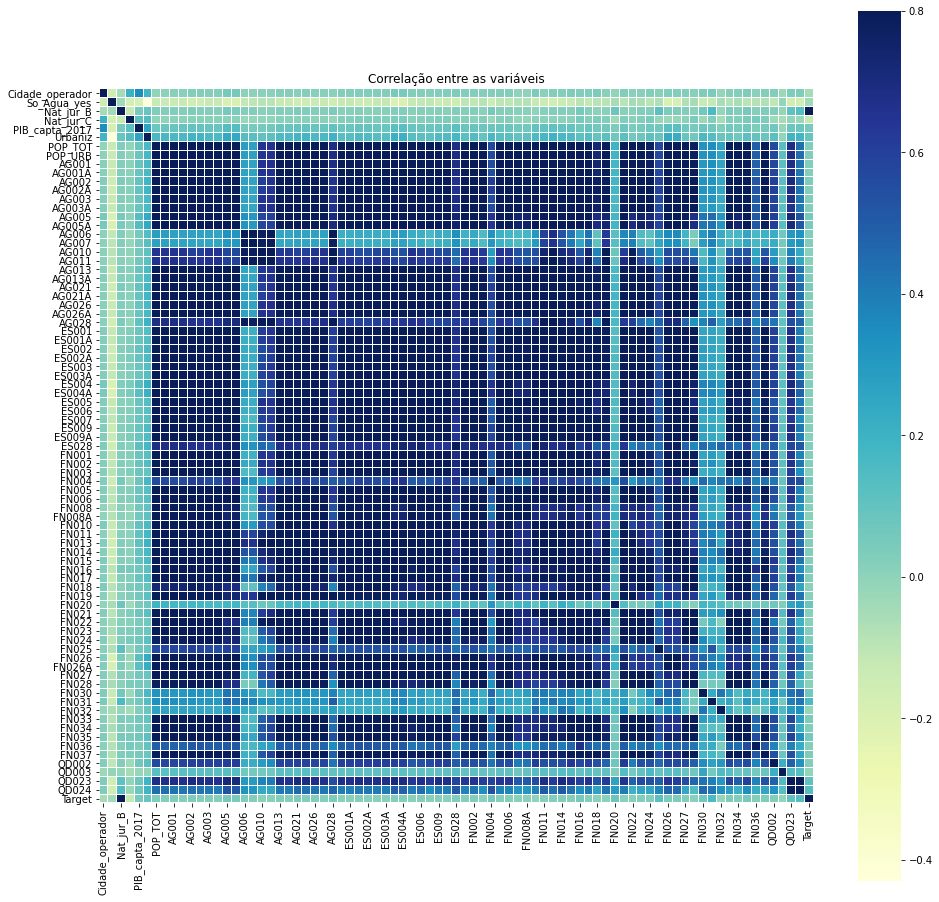

In [80]:
corr=df1_a.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=False,cmap='YlGnBu',linecolor="white")
plt.title('Correlação entre as variáveis');

In [81]:
df1_a.corr()['Target'].head(60)

                        

Cidade_operador   -0.049051
So_Agua_yes       -0.039868
Nat_jur_B          1.000000
Nat_jur_C         -0.118726
PIB_capta_2017     0.048334
Urbaniz            0.091431
POP_TOT            0.027234
POP_URB            0.026093
AG001              0.028369
AG001A             0.020750
AG002              0.033463
AG002A             0.024441
AG003              0.024692
AG003A             0.018796
AG005              0.057849
AG005A             0.044780
AG006              0.028081
AG007              0.022960
AG010              0.007996
AG011              0.013281
AG013              0.025376
AG013A             0.017769
AG021              0.036411
AG021A             0.026004
AG026              0.027467
AG026A             0.020788
AG028              0.036446
ES001              0.016233
ES001A             0.013084
ES002              0.019559
ES002A             0.016455
ES003              0.014881
ES003A             0.012352
ES004              0.029309
ES004A             0.025316
ES005              0

In [84]:
# Importando Random Forest do sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [110]:
# Variável dependente investimento
df033_x = df2_a.drop('FN033',axis = 1) 
X = df033_x # Selects the features
y = df2_a['FN033'] # Selects the variable we want to predict - ok porque no teve exclusao de linhas

In [111]:
# Random Forest
rf033 = RandomForestClassifier( random_state=42)

In [112]:
rf033.fit(X, y)


ValueError: ignored

In [ ]:
importances = rf033.feature_importances_
df033_coeff = pd.DataFrame(columns = ['Feature', 'Coefficient'])
for i in range(80):
    feat = X.columns[i]
    coeff = importances[i]
    df033_coeff.loc[i] = (feat,coeff)
df033_coeff.sort_values(by='Coefficient', ascending =False, inplace=True)
df033_coeff = df033_coeff.reset_index(drop=True)
df033_coeff.head(40)


In [83]:
df_x = df1_a.drop('Nat_jur_B',axis = 1) 
X = df_x # Selects the features
y = df1_a['Nat_jur_B'] # Selects the variable we want to predict - ok porque no teve exclusao de linhas

In [85]:
# Random Forest
rf = RandomForestClassifier( random_state=42)


In [89]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
importances = rf.feature_importances_
df_coeff = pd.DataFrame(columns = ['Feature', 'Coefficient'])
for i in range(80):
    feat = X.columns[i]
    coeff = importances[i]
    df_coeff.loc[i] = (feat,coeff)
df_coeff.sort_values(by='Coefficient', ascending =False, inplace=True)
df_coeff = df_coeff.reset_index(drop=True)
df_coeff.head(40)

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

df2_a = pd.DataFrame(index=df1_a.index)
for col in df1_a.columns:
    df2_a[col] = df1_a[col].astype(float)
    df2_a[[col]] = scaler.fit_transform(df2_a[[col]])
df2_a

,Cidade_operador,So_Agua_yes,Nat_jur_B,Nat_jur_C,PIB_capta_2017,Urbaniz,POP_TOT,POP_URB,AG001,AG001A,AG002,AG002A,AG003,AG003A,AG005,AG005A,AG006,AG007,AG010,AG011,AG013,AG013A,AG021,AG021A,AG026,AG026A,AG028,ES001,ES001A,ES002,ES002A,ES003,ES003A,ES004,ES004A,ES005,ES006,ES007,ES009,ES009A,...,FN001,FN002,FN003,FN004,FN005,FN006,FN008,FN008A,FN010,FN011,FN013,FN014,FN015,FN016,FN017,FN018,FN019,FN020,FN021,FN022,FN023,FN024,FN025,FN026,FN026A,FN027,FN028,FN030,FN031,FN032,FN033,FN034,FN035,FN036,FN037,QD002,QD003,QD023,QD024,Target
0,0.952381,1.0,1.0,0.0,0.042940,0.947917,0.000733,0.000747,0.000803,0.000786,0.001097,0.001098,0.000689,0.000687,0.002980,0.002937,0.000422,0.000000,0.000352,0.000359,0.000681,0.000677,0.001054,0.001000,0.000741,0.000745,0.000069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000305,0.000602,0.000000,0.004497,0.000344,0.000344,0.000119,0.000083,0.000333,0.000305,0.000539,0.000165,0.000246,0.000816,0.000261,0.000834,0.102523,0.00000,0.000135,0.032755,0.000063,0.000000,0.000363,0.001209,0.001282,0.004052,0.023864,0.000000,0.000000,0.0,0.000090,0.000000,0.000891,0.015831,0.000212,0.000000,0.000000,0.002583,0.002980,1.0
1,0.000000,0.0,1.0,0.0,0.053005,0.843750,0.008655,0.007438,0.008015,0.007170,0.008605,0.007792,0.005881,0.005318,0.007588,0.007692,0.003989,0.004139,0.002260,0.001972,0.006359,0.005754,0.009752,0.009394,0.007451,0.007184,0.007866,0.000185,0.000160,0.000235,0.000209,0.000144,0.000127,0.000517,0.000524,0.000243,0.000279,0.000111,0.000207,0.000210,...,0.001260,0.002455,0.000033,0.015766,0.001472,0.001222,0.001841,0.001431,0.001422,0.004368,0.004539,0.003592,0.002692,0.000000,0.003120,0.000000,0.104559,0.00000,0.000673,0.032403,0.003156,0.003947,0.007478,0.014712,0.007694,0.007663,0.034095,0.000000,0.048736,0.0,0.003736,0.000000,0.000000,0.015831,0.000000,0.007505,0.000600,0.020966,0.024188,1.0
2,0.571429,0.0,1.0,0.0,0.091053,0.927083,0.004626,0.004404,0.004576,0.004453,0.006912,0.007034,0.004547,0.004725,0.012048,0.012062,0.003781,0.000000,0.002691,0.003134,0.004581,0.004747,0.006665,0.006915,0.004356,0.004462,0.009339,0.004719,0.004591,0.008348,0.008181,0.005300,0.004957,0.012261,0.012227,0.006802,0.007772,0.005401,0.007354,0.007229,...,0.003088,0.003356,0.002814,0.011280,0.003212,0.003048,0.001650,0.001504,0.002804,0.001455,0.008879,0.004935,0.003842,0.004072,0.003043,0.000000,0.104830,0.00000,0.004295,0.034427,0.005053,0.006366,0.010328,0.011487,0.009617,0.006091,0.023674,0.023337,0.039681,0.0,0.005875,0.002351,0.004445,0.015831,0.002798,0.000000,0.000000,0.036335,0.041096,1.0
3,0.952381,0.0,1.0,0.0,0.077378,0.864583,0.004174,0.003703,0.003709,0.003627,0.004589,0.004561,0.003204,0.003176,0.010171,0.010246,0.002294,0.002380,0.001725,0.002101,0.003206,0.003231,0.004845,0.004818,0.003716,0.003635,0.003008,0.002027,0.001975,0.001854,0.001611,0.001255,0.001178,0.006703,0.006761,0.002267,0.002602,0.001110,0.001722,0.001491,...,0.001974,0.002859,0.001064,0.007915,0.002053,0.001927,0.001607,0.001898,0.001150,0.005475,0.003295,0.002103,0.001986,0.005300,0.002057,0.000000,0.105375,0.00000,0.003165,0.034203,0.000820,0.000500,0.004730,0.005643,0.005129,0.005127,0.023674,0.008286,0.000000,0.0,0.001006,0.010175,0.005786,0.015831,0.008910,0.000000,0.000000,0.022496,0.023527,1.0
4,0.738095,0.0,1.0,0.0,0.084438,1.000000,0.001512,0.001577,0.001587,0.001549,0.002858,0.002577,0.003597,0.003475,0.007764,0.007731,0.000704,0.000730,0.001143,0.001938,0.003584,0.002651,0.002726,0.002654,0.001590,0.001552,0.000547,0.000301,0.000294,0.000234,0.000230,0.000633,0.000604,0.000913,0.000925,0.000547,0.000629,0.000497,0.000225,0.000222,...,0.002240,0.003835,0.000601,0.007201,0.002305,0.002273,0.001450,0.000183,0.001745,0.002568,0.001204,0.004468,0.003035,0.000000,0.002143,0.000000,0.103416,0.03312,0.000384,0.034143,0.033104,0.004106,0.005384,0.006651,0.008335,0.006777,0.023790,0.000000,0.278587,0.0,0.021358,0.000000,0.000000,0.015831,0.000000,0

In [91]:
df_2x = df2_a.drop('Nat_jur_B',axis = 1) 
X = df_2x # Selects the features
y = df2_a['Nat_jur_B'] # Selects the variable we want to predict - ok porque no teve exclusao de linhas

In [92]:
# Random Forest
rf2 = RandomForestClassifier( random_state=42)

In [93]:
rf2.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [95]:
importances = rf2.feature_importances_
df2_coeff = pd.DataFrame(columns = ['Feature', 'Coefficient'])
for i in range(80):
    feat = X.columns[i]
    coeff = importances[i]
    df2_coeff.loc[i] = (feat,coeff)
df2_coeff.sort_values(by='Coefficient', ascending =False, inplace=True)
df2_coeff = df2_coeff.reset_index(drop=True)
df2_coeff.head(40)

,Feature,Coefficient
0,Target,0.373556
1,Cidade_operador,0.046376
2,FN031,0.038890
3,FN025,0.027720
4,FN008A,0.024288
5,FN010,0.018023
6,FN035,0.017983
7,FN016,0.017275
8,FN034,0.016557
9,FN030,0.016401


In [113]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: ignored